회차별 데이터 수집

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

main_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin" # 마지막 회차를 얻기 위한 주소
basic_url = "https://www.dhlottery.co.kr/gameResult.do?method=byWin&drwNo=" # 임의의 회차를 얻기 위한 주소

# 마지막 회차 정보를 가져옴
def GetLast(): 
    resp = requests.get(main_url)
    soup = BeautifulSoup(resp.text, "lxml")
    result = str(soup.find("meta", {"id" : "desc", "name" : "description"})['content'])
    s_idx = result.find(" ")
    e_idx = result.find("회")
    return int(result[s_idx + 1 : e_idx])

# 지정된 파일에 지정된 범위의 회차 정보를 기록함
def Crawler(s_count, e_count, fp):
    for i in range(s_count , e_count + 1):
        crawler_url = basic_url + str(i)
        resp = requests.get(crawler_url)
        soup = BeautifulSoup(resp.text, "html.parser")

        text = soup.text

        s_idx = text.find(" 당첨결과")
        s_idx = text.find("당첨번호", s_idx) + 4
        e_idx = text.find("보너스", s_idx)
        numbers = text[s_idx:e_idx].strip().split()

        s_idx = e_idx + 3
        e_idx = s_idx + 3
        bonus = text[s_idx:e_idx].strip()

        s_idx = text.find("1등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money1 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("2등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money2 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("3등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money3 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("4등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money4 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        s_idx = text.find("5등", e_idx) + 2
        e_idx = text.find("원", s_idx) + 1
        e_idx = text.find("원", e_idx)
        money5 = text[s_idx:e_idx].strip().replace(',','').split()[2]

        line = str(i) + ',' + numbers[0] + ',' + numbers[1] + ',' + numbers[2] + ',' + numbers[3] + ',' + numbers[4] + ',' + numbers[5] + ',' + bonus + ',' + money1 + ',' + money2 + ',' + money3 + ',' + money4 + ',' + money5
        print(line)
        line += '\n'
        fp.write(line)

last = GetLast() # 마지막 회차를 가져옴

fp = open('2021-2-27-keras_lstm_lotto_v895_data.csv', 'w')
Crawler(1, last, fp) # 처음부터 마지막 회차까지 저장
fp.close()

1,10,23,29,33,37,40,16,0,143934100,5140500,113400,10000
2,9,13,21,25,32,42,2,2002006800,94866800,1842000,100800,10000
3,11,16,19,21,27,31,30,2000000000,0,1174100,54900,10000
4,14,27,30,31,40,42,2,0,211191200,7282400,152100,10000
5,16,24,29,40,41,42,3,0,0,6033800,166500,10000
6,14,15,26,27,40,42,34,6574451700,196297600,4267300,87600,10000
7,2,9,16,25,26,40,42,0,48165000,1605500,65500,10000
8,8,19,25,34,37,39,9,0,131555000,2268100,110500,10000
9,2,4,16,17,36,39,14,0,769456500,8743800,260000,10000
10,9,25,30,33,41,44,6,6430437900,40813400,856400,27300,10000
11,1,7,36,37,41,42,14,4780152300,362132700,9307100,206800,10000
12,2,11,21,25,39,45,44,1348845700,99914400,1417500,70200,10000
13,22,23,25,37,38,42,26,0,433309300,5777400,175600,10000
14,2,6,12,31,33,40,15,9375048300,130363400,2568700,93900,10000
15,3,4,16,30,31,37,13,17014245000,177231700,5571100,144600,10000
16,6,7,24,37,38,40,33,4377146100,243174700,3385200,123500,10000
17,3,4,9,17,32,37,1,5349491200,297193900,2342100,86700,10000
18

1 ~ 45는 수치나 위치상의 의미는 없는 범주형 데이터이기 때문에

원 핫 인코딩 처리를 해준다.

이제 로또 번호를 수치상의 의미를 가지는 것이 아닌 45개 경우의 수 중 하나인 클래스(범주)로 다룰 수 있다.

따라서 만일 이전회차의 당첨 번호가 "1,2,3,4,5,6”이라면 아래와 같이 벡터로 표시가능하다.

        1,2,3,4,5,6 : 111111000000000000000000000000000000000000000

In [ ]:
import numpy as np

# 당첨번호 원 핫 인코딩으로 변환
def numbers2onehot(numbers):

    onehot = np.zeros(45) # 45개의 빈 칸 생성

    for i in range(6): # 여섯 개의 당첨 번호에 대해서 반복
        onehot[int(numbers[i])-1] = 1 # 인덱스는 0부터 44
    
    return onehot

# 원 핫 인코딩 벡터를 번호로 변환
def onehot2numbers(onehot):

    numbers = []
    
    for i in range(len(onehot)):
        if onehot[i] == 1.0: # 1.0으로 설정되어 있으면 해당 번호를 반환값에 추가
            numbers.append(i+1)
    
    return numbers

In [ ]:
# 1회차 당첨번호 출력

print("1:" + str(numbers2onehot([10,23,29,33,37,40])))

1:[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]


수집한 데이터로 X와 Y로 구성된 샘플을 구성해보기...

파일을 로딩하고, 제작일(2021년 02월 21일)기준 1회차부터 951회차까지 있으므로 총 951개의 행이 존재.

In [ ]:
rows = np.loadtxt("./2021-2-27-keras_lstm_lotto_v895_data.csv", delimiter=",")
row_count = len(rows)

print("row count: " + str(row_count)) # 행 갯수 출력

row count: 951


각 행에서 당첨번호만 추출해 원 핫 인코딩으로 변환하고, (X,Y) 구성

샘플 중 가장 첫번째 샘플에서 X는 1회차 당첨번호, Y는 2회차 당첨번호인 것 확인하기

In [ ]:
numbers = rows[:, 1:7]
onehots = list(map(numbers2onehot, numbers))

x_samples = onehots[0:row_count-1]
y_samples = onehots[1:row_count]

#원 핫 인코딩으로 표시
print("onehots")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

#번호로 표시
print("numbers")
print("X[0]: " + str(onehot2numbers(x_samples[0])))
print("Y[0]: " + str(onehot2numbers(y_samples[0])))

onehots
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
numbers
X[0]: [10, 23, 29, 33, 37, 40]
Y[0]: [9, 13, 21, 25, 32, 42]


데이터셋 구성!
- 훈련(train)셋 : (1회 입력, 2회 출력) ~ (750회 입력, 751회 출력) 까지 750개 샘플
- 검증(validation)셋 : (751회 입력, 752회 출력) ~ (850회 입력, 851회 출력)까지 100개 샘플
- 시험(test)셋: (851회 입력, 852회 출력) ~ (950회 입력, 951회 출력)까지 100개 샘플

In [ ]:
train_idx = (0, 750)
val_idx = (750, 850)
test_idx = (850, len(x_samples))

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx))

train: (0, 750), val: (750, 850), test: (850, 950)


텐서플로를 통해, 상태유지 LSTM 모델 구성

In [ ]:
import tensorflow as tf

# 모델을 정의합니다.
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    tf.keras.layers.Dense(45, activation='sigmoid') # 활성화 함수를 sigmoid로 설정
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 매 에포크마다 
train_loss = [] # 훈련 손실 기록
train_acc = [] # 훈련 정확도 기록
val_loss = [] # 검증 손실 기록
val_acc = [] # 검증 정확도 기록

# 100 에포크 수행
for epoch in range(100):

    model.reset_states() # 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) # 배치만큼 모델에 학습 => 모델을 학습시키는 코드는 이 한 줄

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) # 배치만큼 모델에 입력하여 나온 답을 정답과 비교
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

    # 오버피팅이 일어나지 않은 최적의 모델을 찾는게 목표이므로 매 에포크마다 학습된 모델 파일로 저장하기
    model.save('model_{0:04d}.h5'.format(epoch+1))

epoch    0 train acc 0.019 loss 0.409 val acc 0.000 loss 0.396
epoch    1 train acc 0.017 loss 0.397 val acc 0.000 loss 0.396
epoch    2 train acc 0.015 loss 0.394 val acc 0.000 loss 0.395
epoch    3 train acc 0.027 loss 0.392 val acc 0.000 loss 0.395
epoch    4 train acc 0.025 loss 0.389 val acc 0.010 loss 0.396
epoch    5 train acc 0.037 loss 0.384 val acc 0.010 loss 0.399
epoch    6 train acc 0.033 loss 0.378 val acc 0.020 loss 0.402
epoch    7 train acc 0.039 loss 0.372 val acc 0.030 loss 0.405
epoch    8 train acc 0.041 loss 0.365 val acc 0.020 loss 0.408
epoch    9 train acc 0.051 loss 0.358 val acc 0.020 loss 0.411
epoch   10 train acc 0.059 loss 0.351 val acc 0.030 loss 0.414
epoch   11 train acc 0.065 loss 0.342 val acc 0.040 loss 0.419
epoch   12 train acc 0.075 loss 0.334 val acc 0.040 loss 0.423
epoch   13 train acc 0.080 loss 0.325 val acc 0.040 loss 0.428
epoch   14 train acc 0.096 loss 0.316 val acc 0.040 loss 0.433
epoch   15 train acc 0.105 loss 0.307 val acc 0.030 los

학습 후 그래프를 확인해보자. 

- 로또는 독립시행이기 때문에 사실 이전 번호로 학습하는 것이 무의미하고, 당연히 validation set의 loss 는 바로 올라갈 것이다.

- 실전의 일반적 데이터 셋, 모델은 validation loss가 떨어지다가 다시 올라가는 양상을 보인다.
다시 올라가는 시점이 오버피팅이고, 이 시점 이전의 모델을 사용하거나, 오버피팅을 줄일 방법을 생각해야한다.

In [ ]:
# 모델 학습 과정 그래프로 표현
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

모델을 검증해보자.

로또는 1등을 맞추는 게 젤 좋지만 ㅎㅎ;; 등수가 낮아도 상금을 타는 확률이 높은게 좋을 수도 있다.

따라서 등수와 상금을 한번 검증을 위한 metric으로 추가해도록 한다.

이렇게 등수와 상금을 metric으로 추가한다는 것은 모델에게 아래의 내용을 알려주는 것이다.

        당첨 번호를 맞추는 것(1등)도 중요하지만, 몇 등인지 그리고 상금이 얼마인지도 중요하다.

In [ ]:
# 88회 이전은 한 번당 가격이 2천원이어서 제외
# 88회부터 지금까지 1등부터 5등까지 상금의 평균을 계산
mean_prize = [  np.mean(rows[87:, 8]),
                np.mean(rows[87:, 9]),
                np.mean(rows[87:, 10]),
                np.mean(rows[87:, 11]),
                np.mean(rows[87:, 12])]
# 상금의 평균 출력
print(mean_prize)           

[2434871184.396991, 57182044.42013889, 1451057.7233796297, 52859.92824074074, 5000.0]


In [ ]:
# 등수와 상금 반환
# 순위에 오르지 못한 경우에는 등수가 0으로 반환
def calc_reward(true_numbers, true_bonus, pred_numbers):

    count = 0

    for ps in pred_numbers:
        if ps in true_numbers:
            count += 1

    if count == 6:
        return 0, mean_prize[0]
    elif count == 5 and true_bonus in pred_numbers:
        return 1, mean_prize[1]
    elif count == 5:
        return 2, mean_prize[2]
    elif count == 4:
        return 3, mean_prize[3]
    elif count == 3:
        return 4, mean_prize[4]

    return 5, 0

모델의 출력은 45개의 0.0 ~ 1.0 사이 값이 출력되는 1차원 벡터이다. 

각 번호에 할당된 값이 1.0에 가까울수록 모델이 판단하기에 당첨확률이 높다고 판단한 값

5000원을 자주 한다고 쳤을때 
당첨번호 하나로 5개 다 넣는 것은 뭔가 좀 꺼려진다.
따라서 서로 다른 번호 5개를 뽑아내보자.

- 45개의 벡터마다 출력 값에 100을 곱하고 1을 더해 그 수만큼 해당 번호의 공을 만든다고 생각
- 그 후에 하나를 고르고 다시 박스에 넣고, 고른 번호가 이전 번호와 겹치지 않으면 저장의 과정을 6개까지 반복한다.

In [ ]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

학습한 모델과, 그 모델의 결과를 이용해 번호를 생성하는 함수를 만들었다.

사용해보자.

In [ ]:
train_total_reward = []
train_total_grade = np.zeros(6, dtype=int)

val_total_reward = []
val_total_grade = np.zeros(6, dtype=int)

test_total_reward = []
test_total_grade = np.zeros(6, dtype=int)

model.reset_states()

print('[No. ] 1st 2nd 3rd 4th 5th 6th Rewards')

for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1, 1, 45)
    ys_pred = model.predict_on_batch(xs) # 모델의 출력값을 얻음
    
    sum_reward = 0
    sum_grade = np.zeros(6, dtype=int) # 6등까지 변수

    for n in range(10): # 10번 수행
        numbers = gen_numbers_from_probability(ys_pred[0])
        
        # i회차 입력 후 나온 출력을 i+1회차와 비교
        grade, reward = calc_reward(rows[i+1,1:7], rows[i+1,7], numbers) 

        sum_reward += reward
        sum_grade[grade] += 1

        if i >= train_idx[0] and i < train_idx[1]:
            train_total_grade[grade] += 1
        elif i >= val_idx[0] and i < val_idx[1]:
            val_total_grade[grade] += 1
        elif i >= test_idx[0] and i < test_idx[1]:
            val_total_grade[grade] += 1
    
    if i >= train_idx[0] and i < train_idx[1]:
        train_total_reward.append(sum_reward)
    elif i >= val_idx[0] and i < val_idx[1]:
        val_total_reward.append(sum_reward)
    elif i >= test_idx[0] and i < test_idx[1]:
        test_total_reward.append(sum_reward)
                        
    print('[{0:4d}] {1:3d} {2:3d} {3:3d} {4:3d} {5:3d} {6:3d} {7:15,d}'.format(i+1, sum_grade[0], sum_grade[1], sum_grade[2], sum_grade[3], sum_grade[4], sum_grade[5], int(sum_reward)))

print('Total') 
print('==========')    
print('Train {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(train_total_grade[0], train_total_grade[1], train_total_grade[2], train_total_grade[3], train_total_grade[4], train_total_grade[5], int(sum(train_total_reward))))
print('Val   {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(val_total_grade[0], val_total_grade[1], val_total_grade[2], val_total_grade[3], val_total_grade[4], val_total_grade[5], int(sum(val_total_reward))))
print('Test  {0:5d} {1:5d} {2:5d} {3:5d} {4:5d} {5:5d} {6:15,d}'.format(test_total_grade[0], test_total_grade[1], test_total_grade[2], test_total_grade[3], test_total_grade[4], test_total_grade[5], int(sum(test_total_reward))))
print('==========')    

[No. ] 1st 2nd 3rd 4th 5th 6th Rewards
[   1]   3   1   0   1   0   0   7,361,848,457
[   2]   3   0   1   1   0   0   7,306,117,470
[   3]   0   0   5   0   0   0       7,255,288
[   4]   1   0   2   2   0   0   2,437,879,019
[   5]   3   0   1   1   0   0   7,306,117,470
[   6]   2   0   3   0   0   0   4,874,095,541
[   7]   3   0   2   0   0   0   7,307,515,668
[   8]   2   0   1   2   0   0   4,871,299,146
[   9]   2   0   2   1   0   0   4,872,697,344
[  10]   1   0   2   2   0   0   2,437,879,019
[  11]   0   0   5   0   0   0       7,255,288
[  12]   1   0   2   2   0   0   2,437,879,019
[  13]   1   0   4   0   0   0   2,440,675,415
[  14]   2   0   2   1   0   0   4,872,697,344
[  15]   2   0   3   0   0   0   4,874,095,541
[  16]   2   1   1   1   0   0   4,928,428,330
[  17]   1   0   4   0   0   0   2,440,675,415
[  18]   1   0   4   0   0   0   2,440,675,415
[  19]   1   0   4   0   0   0   2,440,675,415
[  20]   0   0   2   2   1   0       3,012,835
[  21]   3   1   1   

모델의 검증은 여러 metric을 적용, 위에서 생성한 상금 관련 metric들

학습한 모델의 결과를 2회차부터 지금까지 추론하면 상금이 얼마인지 그래프로 표시해보자.

750번까지는 이미 학습한 것이기에 결과를 믿을 수 없다.
그 후는 학습으로 로또를 맞출 수 없다는 결과를 잘 보여준다.

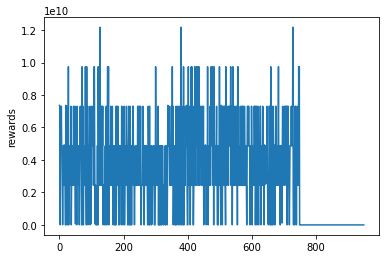

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

total_reward = train_total_reward + val_total_reward + test_total_reward

plt.plot(total_reward)
plt.ylabel('rewards')
plt.show()

훈련셋, 검증셋, 시험셋으로 상금을 막대그래프로 표시해보면 훈련셋을 제외하고는 보이지도 않는다. ㅎ

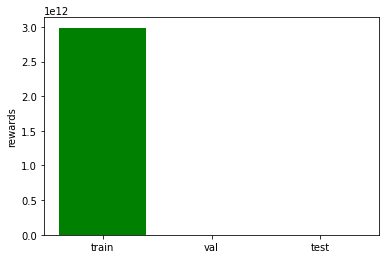

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

rewards = [sum(train_total_reward), sum(val_total_reward), sum(test_total_reward)]

class_color=['green', 'blue', 'red']

plt.bar(['train', 'val', 'test'], rewards, color=class_color)
plt.ylabel('rewards')
plt.show()

우리가 다음회 로또 번호를 예측하기 위해서는 직전까지만 학습한 것을 가지고 다음 회차만 추론하면 된다.

한 스텝을 에측하는 문제는 walk-forward model validation 방법을 사용한다.

walk-forward model validation을 이용한 검증 및 검증 셋을 이용한 하아피파라미터 튜닝을 해야하지만 로또 번호는 학습이 큰 의미가 없음을 이미 어느정도 느꼈으므로 다음 기회에..

In [ ]:
# 100 에포크 수행
for epoch in range(100):

    model.reset_states() # 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화

    for i in range(len(x_samples)):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) # 배치만큼 모델에 학습

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))  

epoch    0 train acc 0.152 loss 0.139
epoch    1 train acc 0.152 loss 0.174
epoch    2 train acc 0.155 loss 0.174
epoch    3 train acc 0.158 loss 0.167
epoch    4 train acc 0.159 loss 0.160
epoch    5 train acc 0.160 loss 0.152
epoch    6 train acc 0.160 loss 0.144
epoch    7 train acc 0.162 loss 0.138
epoch    8 train acc 0.161 loss 0.132
epoch    9 train acc 0.162 loss 0.126
epoch   10 train acc 0.163 loss 0.122
epoch   11 train acc 0.162 loss 0.117
epoch   12 train acc 0.163 loss 0.113
epoch   13 train acc 0.163 loss 0.109
epoch   14 train acc 0.164 loss 0.106
epoch   15 train acc 0.164 loss 0.102
epoch   16 train acc 0.164 loss 0.099
epoch   17 train acc 0.164 loss 0.096
epoch   18 train acc 0.164 loss 0.094
epoch   19 train acc 0.165 loss 0.092
epoch   20 train acc 0.165 loss 0.089
epoch   21 train acc 0.165 loss 0.087
epoch   22 train acc 0.165 loss 0.085
epoch   23 train acc 0.165 loss 0.083
epoch   24 train acc 0.164 loss 0.081
epoch   25 train acc 0.165 loss 0.079
epoch   26 t

In [ ]:
# 마지막 회차까지 학습한 모델로 다음 회차 추론

print('result')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(1, 6):
    numbers = gen_numbers_from_probability(ys_pred[0])
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)  

result
1 : [11, 32, 26, 24, 12, 31]
2 : [24, 37, 30, 12, 32, 27]
3 : [12, 32, 37, 3, 26, 24]
4 : [11, 36, 32, 22, 31, 24]
5 : [37, 32, 26, 24, 31, 11]
